## Cargamos el dataset de Udemy y verificamos sus propiedades ##

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dfUdemy = pd.read_csv('../Moocs/udemy_courses.csv')
dfUdemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [7]:
dfUdemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [8]:
dfUdemy.nunique()

course_id              3672
course_title           3663
url                    3672
is_paid                   2
price                    38
num_subscribers        2197
num_reviews             511
num_lectures            229
level                     4
content_duration        105
published_timestamp    3672
subject                   4
dtype: int64

In [59]:
dfUdemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


## Informacion y visualizacion de los datos: ##

Cantidad de cursos: 3678
Cantidad de cursos pagos: 3368
Cantidad de cursos no pagos: 310


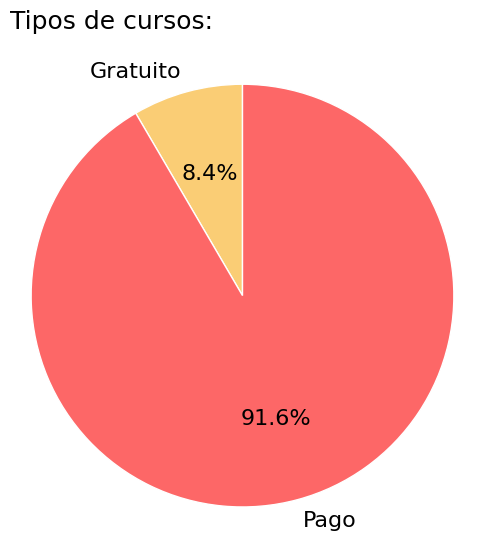

In [72]:
plt.figure(figsize = (6, 6))
plt.pie(dfUdemy.groupby(['is_paid']).size(),
        labels = ['Gratuito', 'Pago'], 
        autopct = '%1.1f%%',
        startangle = 90, colors = ['#facd75','#fd6767'],
        textprops = {'size': 16},
        wedgeprops= {"edgecolor":"white",
                     'linewidth': 1,
                     'antialiased': True})
plt.axis('equal')
plt.title('Tipos de cursos:\n',loc='left', fontdict={'fontsize': 18})
print('Cantidad de cursos: ' + str(len(dfUdemy['course_title'])))
print('Cantidad de cursos pagos: ' + str(len(dfUdemy[dfUdemy['is_paid'] == True]['course_title'])))
print('Cantidad de cursos no pagos: ' + str(len(dfUdemy[dfUdemy['is_paid'] == False]['course_title'])))
plt.show()

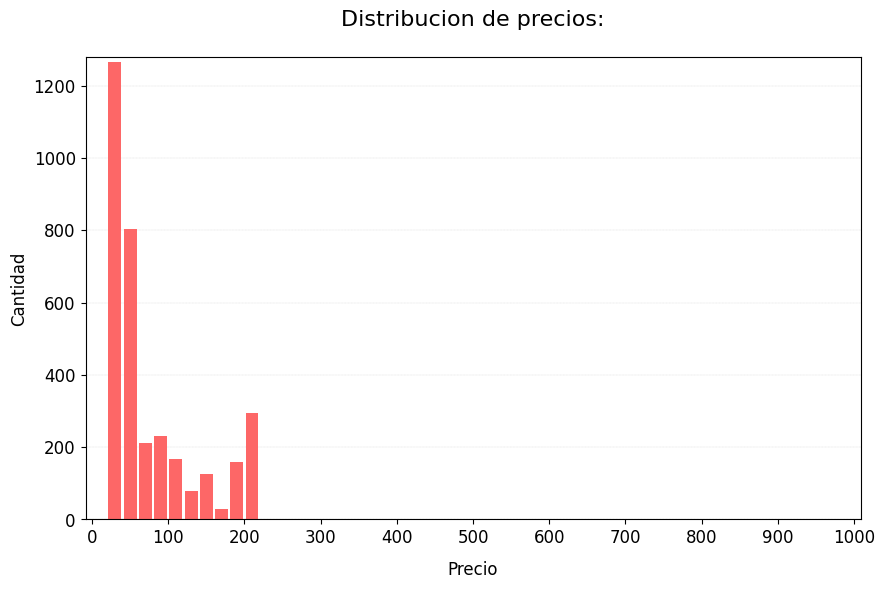

In [64]:
plt.rcParams.update({'font.size': 12, 'axes.axisbelow': True})
plt.figure(figsize = (10, 6))
plt.hist(dfUdemy[dfUdemy['is_paid']==True]['price'],bins=50,range=(0,1000), rwidth=0.85,
         color='#fd6767')
plt.grid(axis='y', color ='Grey',
        linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,1001,100))
plt.margins(0.01)
plt.xlabel("Precio", labelpad=10)
plt.ylabel("Cantidad")
plt.title('Distribucion de precios:\n',loc='center', fontdict={'fontsize': 16})
plt.show()

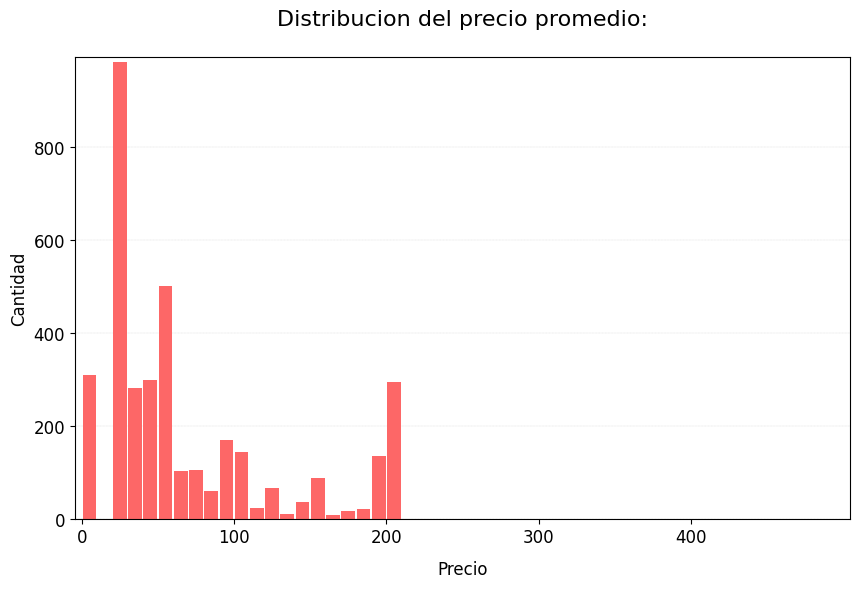

In [65]:
plt.rcParams.update({'font.size': 12, 'axes.axisbelow': True})
plt.figure(figsize = (10, 6))
plt.hist(dfUdemy['price'],bins=50,range=(0,500), rwidth=0.9,
         color='#fd6767')
plt.grid(axis='y', color ='Grey',
        linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,500,100))
plt.margins(0.01)
plt.xlabel("Precio", labelpad=10)
plt.ylabel("Cantidad")
plt.title('Distribucion del precio promedio:\n',loc='center', fontdict={'fontsize': 16})
plt.show()

In [41]:
print("Cantidad de cursos sin inscriptos: ", end='')
print(len(dfUdemy[dfUdemy['num_subscribers']==0]['num_subscribers']))
print("Cantidad de cursos con inscriptos: ", end='')
print(len(dfUdemy[dfUdemy['num_subscribers']>0]['num_subscribers']))
print("Cantidad de cursos con mas de 1000 inscriptos: ", end='')
print(len(dfUdemy[dfUdemy['num_subscribers']>1e3]['course_title']))
print("Cantidad de cursos con mas de 10000 inscriptos: ", end='')
print(len(dfUdemy[dfUdemy['num_subscribers']>1e4]['course_title']))

Cantidad de cursos sin inscriptos: 70
Cantidad de cursos con inscriptos: 3608
Cantidad de cursos con mas de 1000 inscriptos: 1770
Cantidad de cursos con mas de 10000 inscriptos: 257


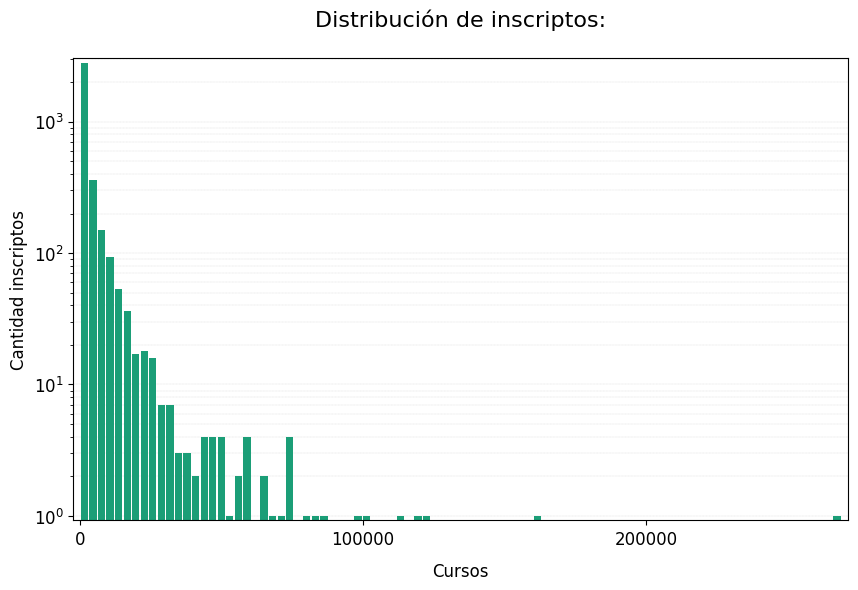

In [61]:
plt.figure(figsize = (10, 6))
plt.hist(dfUdemy[(dfUdemy['num_subscribers']>0) & (dfUdemy['num_subscribers']<1e6)]['num_subscribers'],bins=89, rwidth=0.85, 
         color='#1b9e77')
plt.grid(axis='y', color ='Grey', which='both',
        linestyle ='-.', linewidth = 0.1)
plt.xticks(range(0,1000001,100000))
plt.margins(0.01)
plt.xlabel("Cursos", labelpad=10)
plt.ylabel("Cantidad inscriptos")
plt.yscale('log')
plt.title('Distribución de inscriptos:\n',loc='center', fontdict={'fontsize': 16})
plt.show()

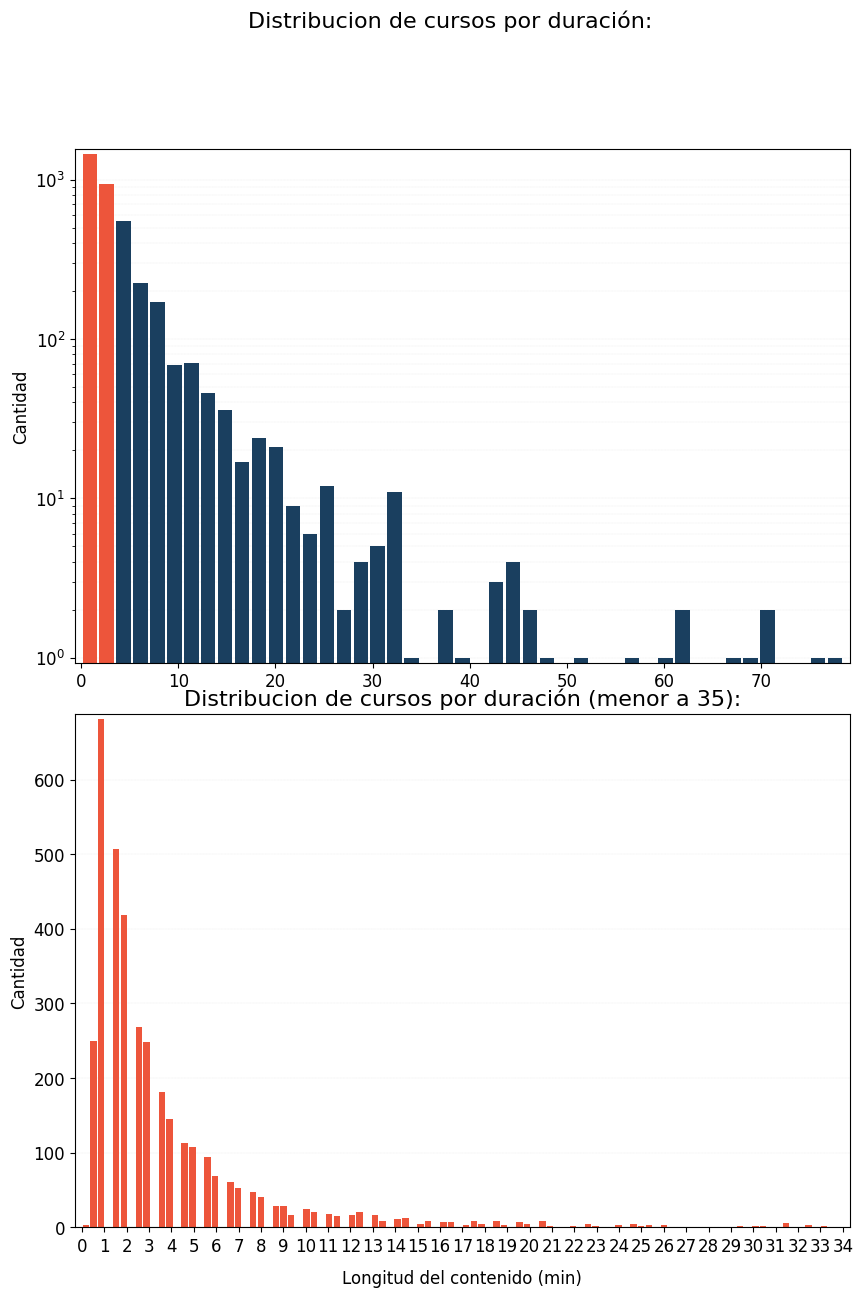

In [66]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (10, 14))
N, bins, patches = ax1.hist(dfUdemy['content_duration'], rwidth=0.85, bins=45,
         color='#1a3f5f')
ax1.grid(axis='y', color ='Grey',
        linestyle ='-.', linewidth = 0.1, which='both',
        alpha = 0.6)
ax1.margins(0.01)
patches[0].set_facecolor('#ed553b')
patches[1].set_facecolor('#ed553b')
plt.sca(ax1)
plt.yscale('log')
plt.ylabel("Cantidad")
ax2.hist(dfUdemy[dfUdemy['content_duration']<35]['content_duration'], rwidth=0.85, bins=100,
         color='#ed553b')
ax2.grid(axis='y', color ='Grey',
        linestyle ='-.', linewidth = 0.1,
        alpha = 0.6)
ax2.margins(0.01)
plt.sca(ax2)
plt.xlabel("Longitud del contenido (min)", labelpad=10)
plt.ylabel("Cantidad")
plt.xticks(range(0,35,1))
plt.subplots_adjust(hspace=0.1)
plt.suptitle('Distribucion de cursos por duración:',fontsize= 16)
plt.title('Distribucion de cursos por duración (menor a 35):',fontsize= 16)
plt.show()

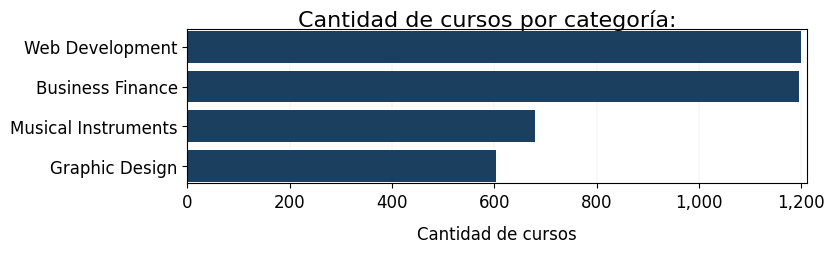

In [52]:
import matplotlib.ticker as ticker

a_df = dfUdemy.groupby(['subject']).size().sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(8, 2)) 
ax.barh(a_df.index, a_df, color='#1a3f5f')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1)))
plt.margins(0.01)
plt.xlabel("Cantidad de cursos", labelpad=10)
plt.grid(axis='x', color ='Grey',
        linestyle ='-.', linewidth = 0.1)
plt.suptitle('Cantidad de cursos por tópico:',fontsize= 16)
plt.show()

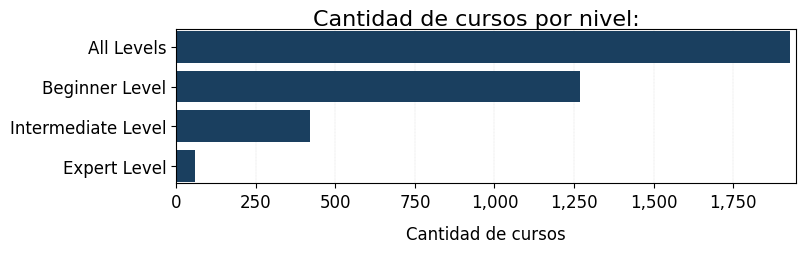

In [53]:
a_df = dfUdemy.groupby(['level']).size().sort_values(ascending=True)
fig, ax = plt.subplots(figsize=(8, 2)) 
ax.barh(a_df.index, a_df, color='#1a3f5f')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1)))
plt.margins(0.01)
plt.xlabel("Cantidad de cursos", labelpad=10)
plt.grid(axis='x', color ='Grey',
        linestyle ='-.', linewidth = 0.1)
plt.suptitle('Cantidad de cursos por nivel:',fontsize= 16)
plt.show()

<AxesSubplot: ylabel='level'>

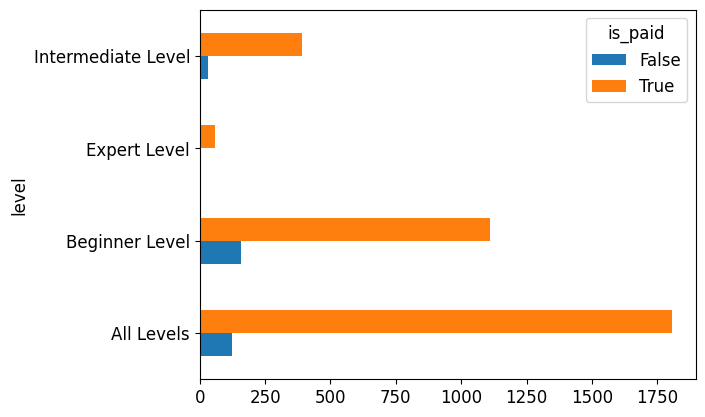

In [57]:
pd.crosstab(dfUdemy['level'],dfUdemy['is_paid']).plot.barh()

<AxesSubplot: ylabel='level'>

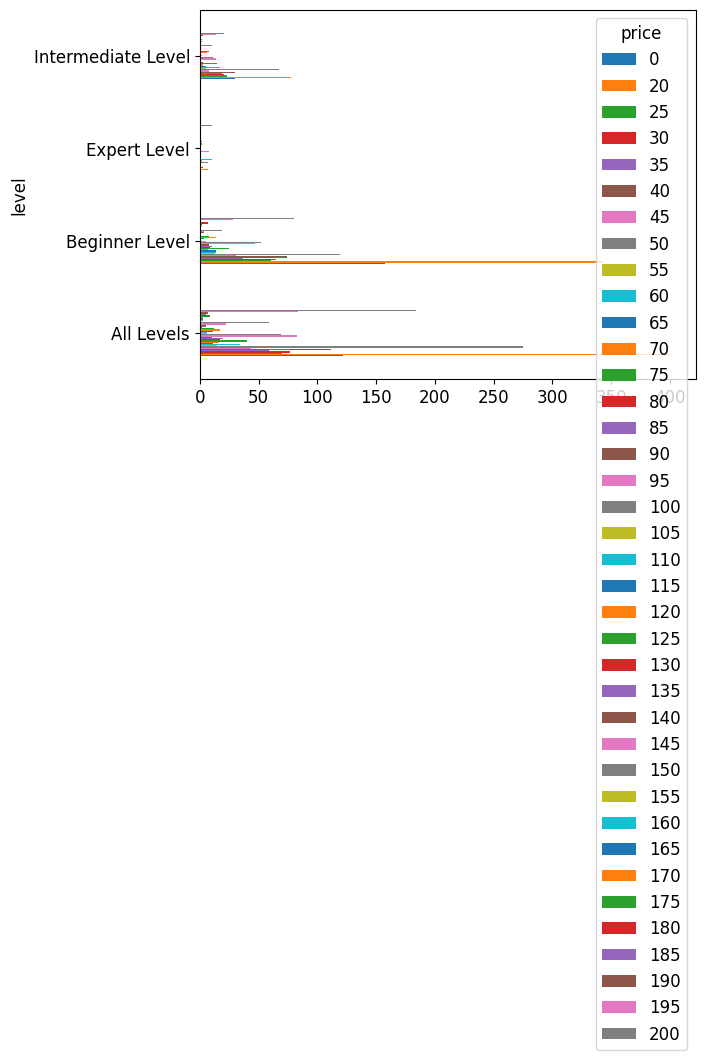

In [62]:
pd.crosstab(dfUdemy['level'],dfUdemy['price']).plot.barh()

# Conclusión #

Con este dataset podemos notar que una pequeña parte de los cursos son gratuitos, especialmente los de nivel mas bajo, esto se puede interpretar como intentar seducir a los estudiantes a empezar un curso para luego comprar los de siguiente nivel de la misma tematica. <br>
También se puede obserbar que los temas con mayor cantidad de curso son  Development y Business Finance.

Escribir cursos para wordcloud

In [67]:
import csv   

with open(r'../Power Bi/wordCloud.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(dfUdemy['course_title'])

In [68]:
dfUdemy.to_csv('../Power Bi/Udemy.csv',index=False)